In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [7]:
df = pd.read_csv("/Users/choiyun/Downloads/sampler.csv",engine='python',encoding='CP949')
df.tail()

,ds,y
235,2020-05-01,1585.8
236,2020-05-02,1577.0
237,2020-05-03,1574.9
238,2020-05-04,1580.6
239,2020-06-01,1588.5


In [8]:
model=Prophet() 
model.fit(df)
future=model.make_future_dataframe(periods=4,freq='w')
forecast=model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
result=forecast[['ds','yhat']]
result.to_csv("/Users/choiyun/Downloads/result.csv", index=False)
result.tail()

,ds,yhat
239,2020-06-01,1717.390143
240,2020-06-07,1737.888957
241,2020-06-14,1754.893891
242,2020-06-21,1754.476336
243,2020-06-28,1733.447534


In [10]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='60 w', period='10 w', horizon = '20 w')
df_cv[['ds','yhat','y','cutoff']].head()

INFO:fbprophet:Making 16 forecasts with cutoffs between 2017-02-27 00:00:00 and 2020-01-13 00:00:00


,ds,yhat,y,cutoff
0,2017-03-01,1878.603309,1842.9,2017-02-27
1,2017-03-02,1880.034963,1841.5,2017-02-27
2,2017-03-03,1887.795075,1837.1,2017-02-27
3,2017-03-04,1894.831045,1830.6,2017-02-27
4,2017-03-05,1900.593434,1822.4,2017-02-27


In [11]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,15 days,3285.566658,57.319863,40.942065,0.022940,0.015428,0.354839
1,16 days,3364.747430,58.006443,42.088405,0.023597,0.015428,0.354839
2,17 days,3373.555199,58.082314,41.102252,0.023051,0.014008,0.419355
3,18 days,3257.199395,57.071879,38.765277,0.021682,0.012563,0.483871
4,19 days,3241.443325,56.933675,37.936349,0.021175,0.007799,0.467742


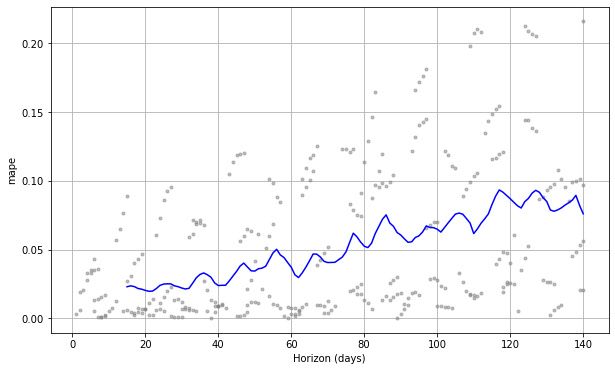

In [12]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
